#### smote + enn
          precision    recall  f1-score   support

          0       0.98      0.96      0.97      1920
          1       0.35      0.51      0.41        80

avg / total       0.95      0.94      0.95      2000

ACCURACY: 0.942

#### smote enn 결측치 2개 delete 했을 때

          precision    recall  f1-score   support

          0       0.98      0.95      0.96      1920
          1       0.28      0.51      0.37        80

avg / total       0.95      0.93      0.94      2000

ACCURACY: 0.929

#### ADASYN

          precision    recall  f1-score   support

          0       0.98      0.97      0.97      1920
          1       0.38      0.46      0.42        80

avg / total       0.95      0.95      0.95      2000

ACCURACY: 0.9485


#### Random oversampling
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      1920
          1       0.30      0.65      0.41        80

avg / total       0.96      0.93      0.94      2000

ACCURACY: 0.9265


### 비식별처리 replace , fillna 해도 비식별처리로 인식됨

In [1]:

import pandas as pd
import numpy as np
import os
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import classification_report
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler ,normalize
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

C:\Users\noni0\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('../../data/Data_set.csv',encoding='cp949')
df1 = pd.read_csv('../../data/Test_set.csv',encoding='cp949')
df1.AGE.value_counts()

50    382
45    374
55    322
40    309
35    214
60    191
30     92
65     68
25     53
20      5
70      5
*       4
Name: AGE, dtype: int64

In [4]:
# df1.SEX.value_counts(0)
# df.TARGET.value_counts()


In [3]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 48 , 40 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 15 }
    )

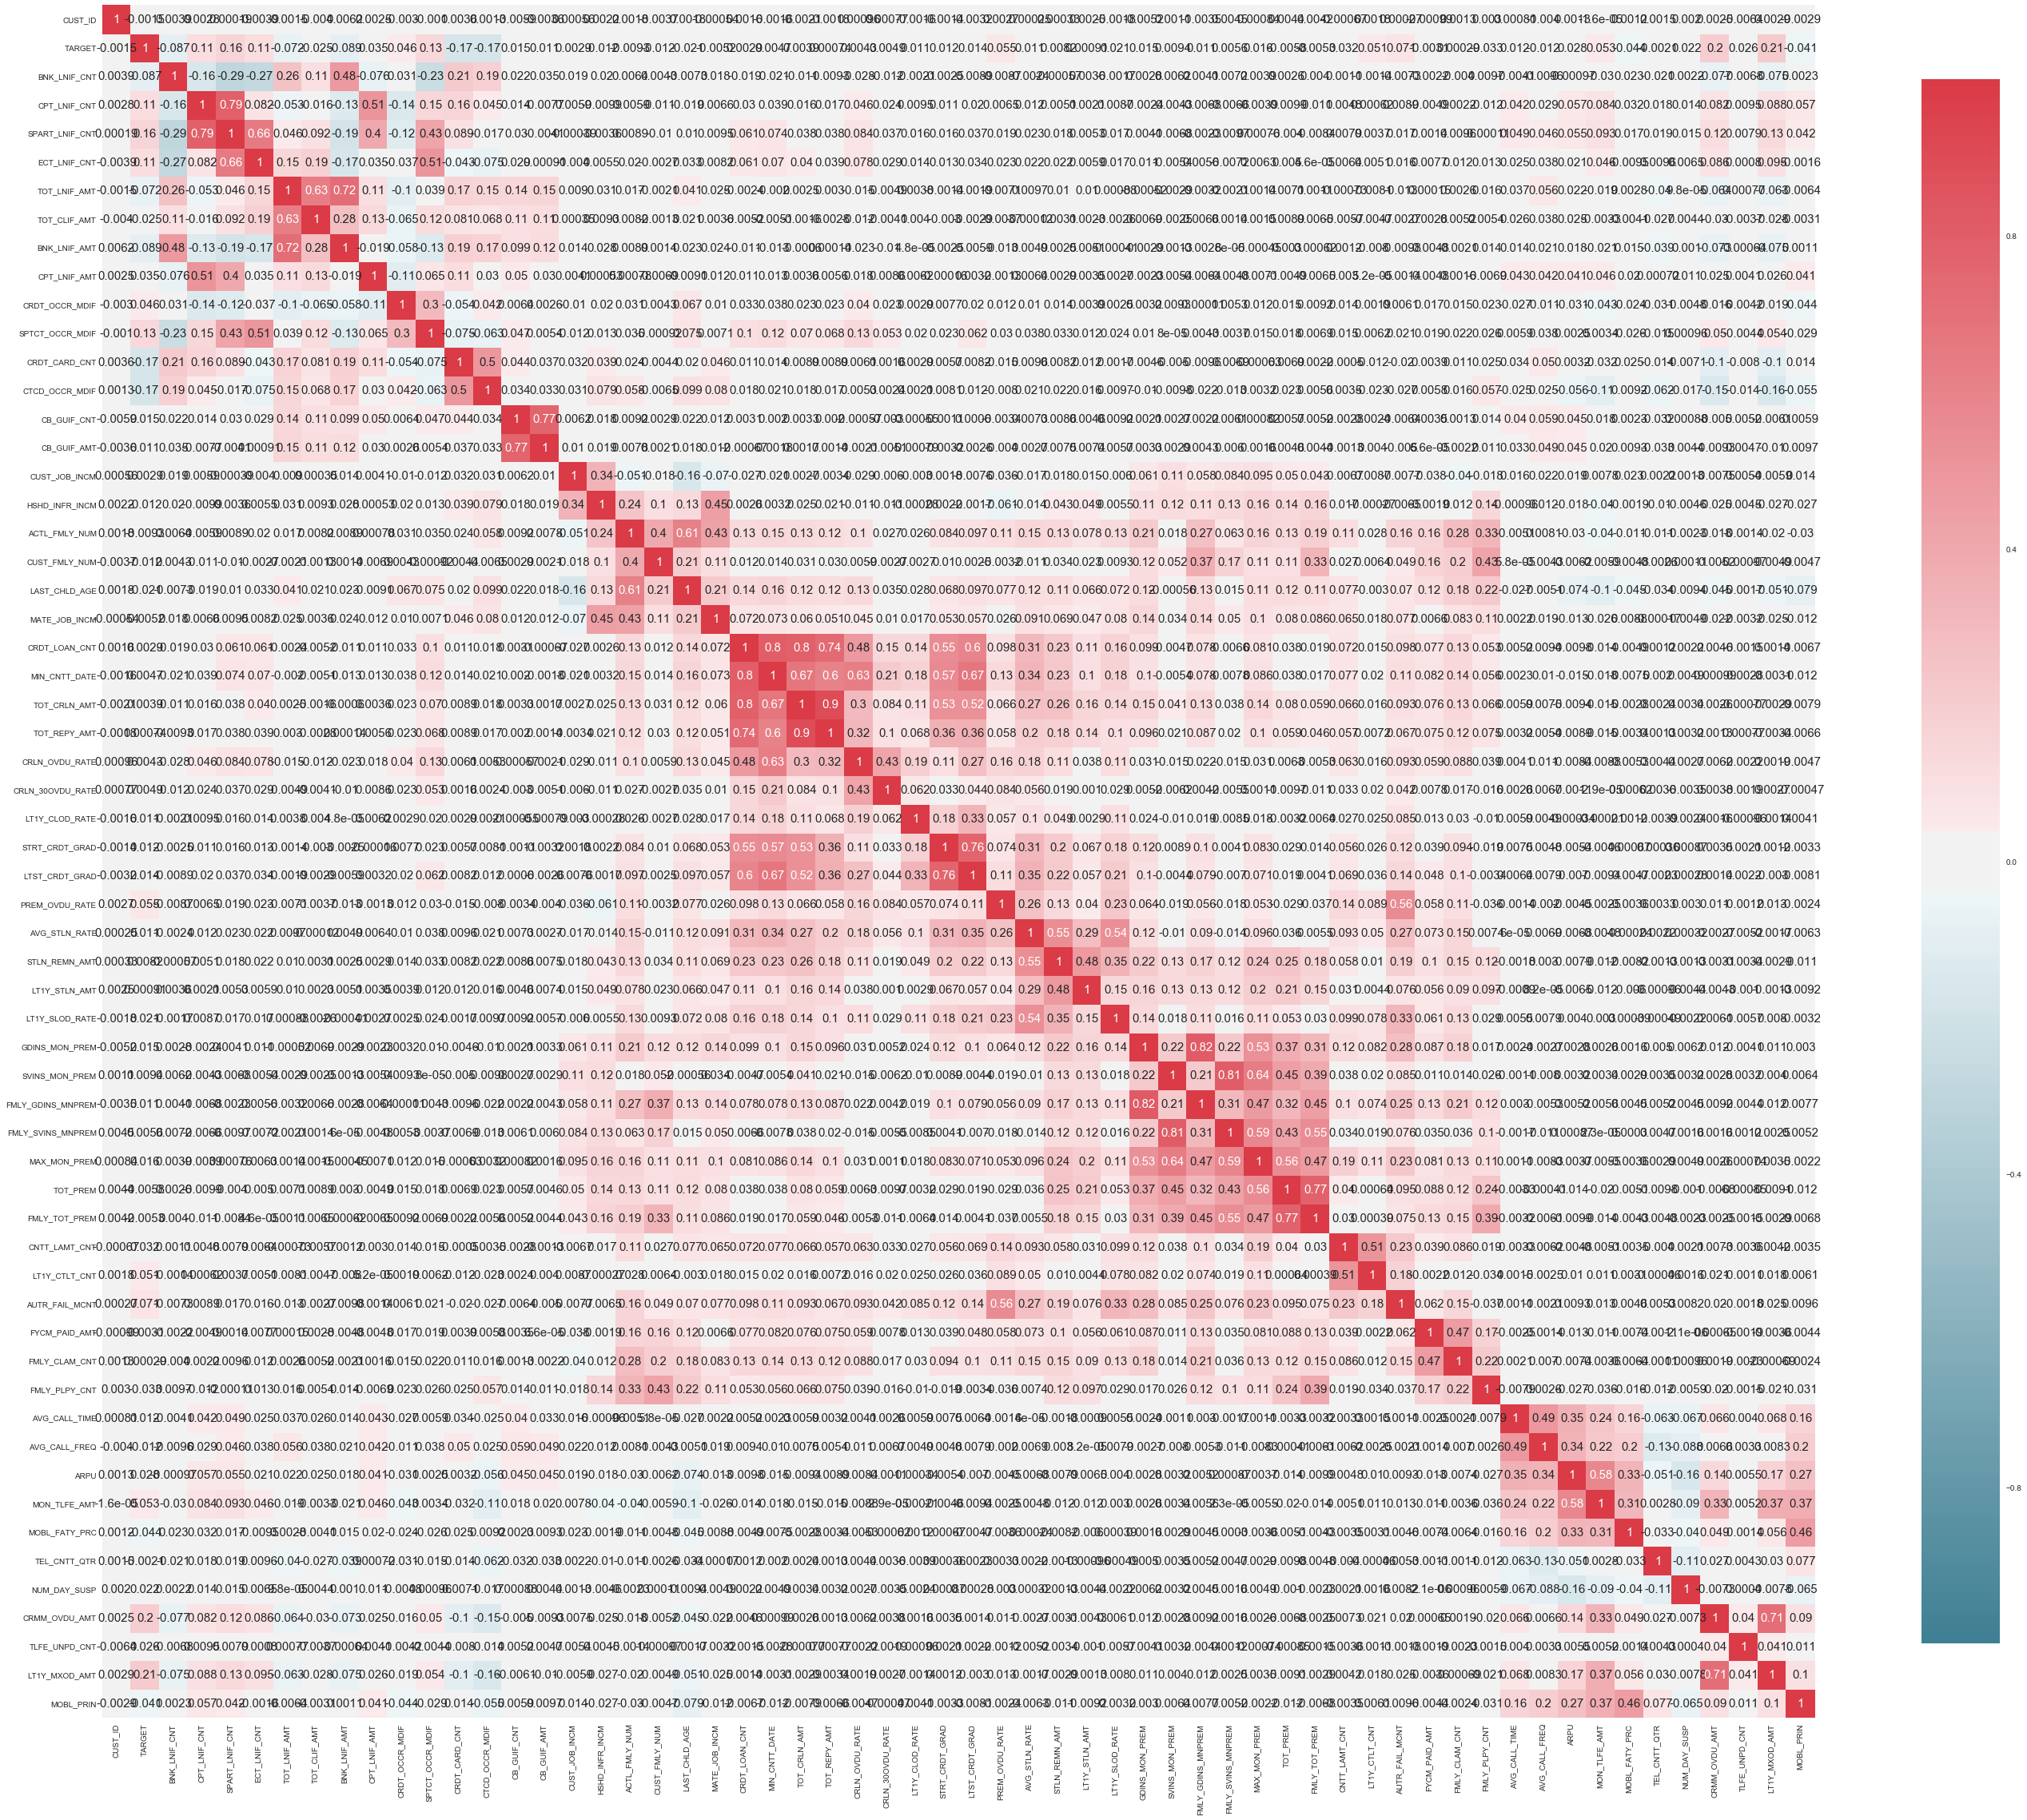

In [4]:
plot_correlation_map( df )

In [12]:
pd.get_dummies(df).head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,TEL_MBSP_GRAD_R,TEL_MBSP_GRAD_W,CBPT_MBSP_YN_N,CBPT_MBSP_YN_Y,PAYM_METD_G,PAYM_METD_K,PAYM_METD_O,PAYM_METD_R,LINE_STUS_S,LINE_STUS_U
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,1,0,0,0,1,0,0,1
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,1,0,0,0,1,0,0,1
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,1,0,0,1,0,0,1
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,1,0,1,0,0,0,1,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,1,0,1,1,0,0,0,0,1


In [13]:
df["AGE"].groupby(df["AGE_20"])

KeyError: 'AGE_20'

In [5]:
star_age = df[df["AGE"] == "*"].index.tolist()
for i in star_age : 
      del df["AGE"][i]
age = np.array(df["AGE"])
age_mean = np.mean(age, dtype=np.float64)

In [6]:
df = pd.read_csv('../../data/Data_set.csv',encoding='cp949')
df1 = pd.read_csv('../../data/Test_set.csv',encoding='cp949')

In [7]:
star_age = df[df["AGE"] == "*"].index.tolist()
for i in star_age : 
    df["AGE"][i] = age_mean

C:\Users\noni0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


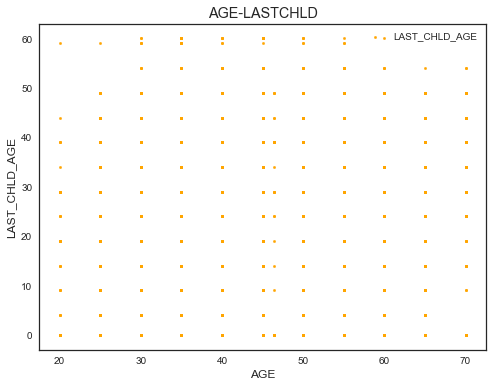

In [8]:
plt.scatter(df["AGE"],df["LAST_CHLD_AGE"], color = "orange", s = 5)
plt.xlabel("AGE")
plt.ylabel("LAST_CHLD_AGE")
plt.title("AGE-LASTCHLD")
plt.legend()
plt.show()

In [9]:
# df.info()
#chld = df[df["LAST_CHLD_AGE"] == "*"].index.tolist()
df["LAST_CHLD_AGE"].value_counts()

0.0     50125
24.0    10774
19.0     9651
29.0     7905
14.0     5801
34.0     5600
39.0     4297
9.0      2862
44.0     1221
4.0       544
49.0      330
54.0       46
60.0       33
59.0       17
Name: LAST_CHLD_AGE, dtype: int64

## MATE_OCCP_NAME_G * 제거

In [10]:
#주부의 추정 소득이 0이고 NaN의 추정소득이 0이기에 NaN값을 주부로 바꿔줌
#고소득 전문직 5848.75
df.MATE_OCCP_NAME_G = df["MATE_OCCP_NAME_G"].fillna("주부")
print(df.MATE_OCCP_NAME_G.value_counts())
of_index = df.MATE_OCCP_NAME_G[df.MATE_OCCP_NAME_G=="2차산업 종사자"].index.tolist()
df.MATE_JOB_INCM.loc[of_index].mean()

주부          57392
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
단순 사무직       1316
*            1027
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64


3812.359689157518

In [11]:
star_index = df[df['MATE_OCCP_NAME_G'] == "*"].index.tolist()

In [12]:
#직업이 *인 사람 중 추정 소득이 0인 사람 주부로 바꿔줌
star_data = df.MATE_JOB_INCM.loc[star_index]
zero_index = star_data[star_data==0].index.tolist()
df.MATE_OCCP_NAME_G.loc[zero_index] = "주부"
no_zero = star_data[star_data != 0]
#* 추정소득 4500이상인 사람 고소득 전문직으로 변경 
#* 추정소득 4500미만인 사람 
high_index = no_zero[no_zero >= 4500].index.tolist()
low_index = no_zero[no_zero < 4500].index.tolist()
df.MATE_OCCP_NAME_G.loc[high_index] = "고소득 전문직"
df.MATE_OCCP_NAME_G.loc[low_index] = "2차산업 종사자"

C:\Users\noni0\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## OCCP_NAME_G *제거

In [13]:
print(df.OCCP_NAME_G.value_counts())
df.OCCP_NAME_G = df["OCCP_NAME_G"].fillna("주부")
s_index = df[df["OCCP_NAME_G"]=="*"].index.tolist()
s_data = df.CUST_JOB_INCM.loc[s_index]
zero_ix = s_data[s_data==0].index.tolist()
df.OCCP_NAME_G[zero_ix] = "주부"
#고소득 전문직, 단순 사무직
on_index = df.OCCP_NAME_G[df.OCCP_NAME_G=="단순 사무직"].index.tolist()
df.CUST_JOB_INCM.loc[on_index].mean()
h_index = s_data[s_data >= 4700].index.tolist()
l_index = s_data[s_data < 4700].index.tolist()
df.OCCP_NAME_G.loc[h_index] = "고소득 전문직"
df.OCCP_NAME_G.loc[l_index] = "단순 사무직"

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
고소득 전문직      1223
*            1189
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64


C:\Users\noni0\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\noni0\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# 멤버쉽등급

In [21]:
def TEL_MBSP_GRAD(columns):   
    df.TEL_CNTT_QTR = convert_type(df.TEL_CNTT_QTR)    
    for i in range(len(columns)):        
        if 2016 - int(df.TEL_CNTT_QTR[i][:4]) < 2 :            
            if df.MON_TLFE_AMT[i]*12 < 480000:                
                columns[i] = '일반'            
            elif df.MON_TLFE_AMT[i]*12 < 600000:
                columns[i] = '실버'            
            else :                
                columns[i] = '골드'        
        elif 2 <= 2016 - int(df.TEL_CNTT_QTR[i][:4]) <5 :
            if df.MON_TLFE_AMT[i]*12*(2016 - int(df.TEL_CNTT_QTR[i][:4])) < 240000:                
                columns[i] = '일반'            
            elif df.MON_TLFE_AMT[i]*12*(2016 - int(df.TEL_CNTT_QTR[i][:4])) < 480000:                
                columns[i] = '실버'            
            elif df.MON_TLFE_AMT[i]*12*(2016 - int(df.TEL_CNTT_QTR[i][:4])) < 900000:
                columns[i] = '골드'              
            else :                
                columns[i] = 'VIP'            
        else :            
            if df.MON_TLFE_AMT[i]*12*(2016 - int(df.TEL_CNTT_QTR[i][:4])) < 360000:                
                columns[i] = '실버'            
            elif df.MON_TLFE_AMT[i]*12*(2016 - int(df.TEL_CNTT_QTR[i][:4])) < 600000:                
                columns[i] = '골드'            
            else :                
                columns[i] = 'VIP'    
    return columns            
df["TEL_MBSP_GRAD"] = TEL_MBSP_GRAD(df.TEL_MBSP_GRAD)

IndexError: invalid index to scalar variable.

In [93]:
df.TEL_MBSP_GRAD.value_counts()

R    19862
W    16692
Q    13641
E     4023
Name: TEL_MBSP_GRAD, dtype: int64

In [15]:
df.isnull().sum()

CUST_ID                  0
TARGET                   0
BNK_LNIF_CNT             0
CPT_LNIF_CNT             0
SPART_LNIF_CNT           0
ECT_LNIF_CNT             0
TOT_LNIF_AMT             0
TOT_CLIF_AMT             0
BNK_LNIF_AMT             0
CPT_LNIF_AMT             0
CRDT_OCCR_MDIF           0
SPTCT_OCCR_MDIF          0
CRDT_CARD_CNT            0
CTCD_OCCR_MDIF           0
CB_GUIF_CNT              0
CB_GUIF_AMT              0
OCCP_NAME_G              0
CUST_JOB_INCM            0
HSHD_INFR_INCM           0
ACTL_FMLY_NUM            0
CUST_FMLY_NUM            0
LAST_CHLD_AGE         1027
MATE_OCCP_NAME_G         0
MATE_JOB_INCM            0
CRDT_LOAN_CNT            0
MIN_CNTT_DATE            0
TOT_CRLN_AMT             0
TOT_REPY_AMT             0
CRLN_OVDU_RATE           0
CRLN_30OVDU_RATE         0
                     ...  
GDINS_MON_PREM           0
SVINS_MON_PREM           0
FMLY_GDINS_MNPREM        0
FMLY_SVINS_MNPREM        0
MAX_MON_PREM             0
TOT_PREM                 0
F

이상치제거-그래프 시각화

In [95]:
pd.concat([df["AGE"],df["LAST_CHLD_AGE"]])

0              50
1              50
2              60
3              35
4              45
5              45
6              40
7              60
8              40
9              40
10             55
11             40
12             25
13             40
14             25
15             30
16             55
17             60
18             45
19             50
20             35
21             35
22        46.3865
23        46.3865
24             55
25             50
26             60
27             60
28             45
29             30
           ...   
100203          9
100204          0
100205          0
100206         29
100207          0
100208         29
100209         19
100210          0
100211         24
100212         34
100213          0
100214          0
100215          0
100216          0
100217          0
100218         34
100219         29
100220          0
100221          0
100222          0
100223          4
100224          4
100225          0
100226        NaN
100227    

평균나이 결측치가 더 적음, 평균나이 기준으로 missing value 찾아서 채워넣기
아래코드는 나이를 비식별화한 column

In [96]:
# df.AGE

# df.AGE = df.AGE.replace('*',46)
# df.AGE = pd.Series(df.AGE).convert_objects(convert_numeric=True)
# df.AGE = df.AGE.replace(0,df.AGE.mean())
# df.AGE.

In [97]:
df.SEX
df.SEX = df.SEX.replace('*',1)
df.SEX = pd.Series(df.SEX).convert_objects(convert_numeric=True)
df.SEX.value_counts()

C:\Users\noni0\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


2    54490
1    45743
Name: SEX, dtype: int64

In [98]:
df.TEL_CNTT_QTR = df.TEL_CNTT_QTR.astype(str)

In [99]:
# df.TEL_CNTT_QTR
# R>W>Q W1238050000  Q938800000
# print(df.TEL_MBSP_GRAD.value_counts())
# t_index = df.TEL_MBSP_GRAD.loc[df.TEL_MBSP_GRAD.isnull()].index.tolist()
# print(df.ARPU.loc[t_index].value_counts())#38917.309355644895
# print(df.ARPU[df.TEL_MBSP_GRAD=="R"].mean())#39648.85250348215
# r_index = df.ARPU[df.ARPU==0].index.tolist()
# df.OCCP_NAME_G.loc[r_index].value_counts()
# lindex = df.ARPU[df.ARPU==0].index.tolist()
# z_data = df.TEL_MBSP_GRAD.loc[lindex]
# qindex = z_data[z_data=="Q"].index.tolist()
# df.ARPU.loc[qindex] = 39648.85250348215
# windex = z_data[z_data=="W"].index.tolist()
# df.ARPU.loc[windex] = 41806.2541337
# eindex = z_data[z_data=="E"].index.tolist()
# df.ARPU.loc[eindex] = 63760.8744718
# eindex = z_data[z_data=="R"].index.tolist()
# df.ARPU.loc[eindex] = 55636.8943712
mindex = df.ARPU[df.ARPU==-1].index.tolist()
m_data = df.TEL_MBSP_GRAD.loc[mindex]
qindex = m_data[m_data=="Q"].index.tolist()
df.ARPU.loc[qindex] = 39648.85250348215
windex = m_data[m_data=="W"].index.tolist()
df.ARPU.loc[windex] = 41806.2541337
eindex = m_data[m_data=="E"].index.tolist()
df.ARPU.loc[eindex] = 63760.8744718
eindex = m_data[m_data=="R"].index.tolist()
df.ARPU.loc[eindex] = 55636.8943712

C:\Users\noni0\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [101]:
df.PAYM_METD = df.PAYM_METD.fillna('O')
df.TEL_MBSP_GRAD = df.TEL_MBSP_GRAD.fillna('Q')

In [102]:
del df['CUST_ID']
del df["LAST_CHLD_AGE"]
df = pd.get_dummies(df)

In [103]:
df_test = df[:2000]
df_train = df[2000:]

In [104]:
x_data = df_train.drop('TARGET',axis=1)
y_data = df_train.TARGET

In [ ]:

X = x_data
y = y_data
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import CondensedNearestNeighbour 

# undersampling
# cnn = CondensedNearestNeighbour(random_state=42) 
# X_resampled, y_resampled = cnn.fit_sample(X, y)

#RANDOM 
# ros = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = ros.fit_sample(X, y)

#ADASYN
# ada = ADASYN(random_state=42,n_neighbors=3)
# X_resampled, y_resampled = ada.fit_sample(X, y)

# Apply SMOTE + ENN
sm = SMOTE(kind='borderline2')
X_resampled, y_resampled = sm.fit_sample(X, y)

In [68]:
df_1 = pd.DataFrame(X_resampled)
df_2 = pd.DataFrame(y_resampled)
df_2.columns = ['TARGET']
df_final = pd.concat([df_1,df_2],axis=1)
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,TARGET
0,0.0,0.0,1.0,1.0,48001.0,48001.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,2.0,0.0,0.0,0.0,48001.0,1.0,48001.0,0.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,1.0,2.0,2.0,0.0,15001.0,3001.0,3001.0,12001.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,1.0,0.0,0.0,0.0,9001.0,9001.0,9001.0,0.0,25.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
4,2.0,0.0,0.0,0.0,39001.0,39001.0,39001.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [69]:
df_final = df_final.sample(frac=1)
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,194,195,196,197,198,199,200,201,202,TARGET
80308,1.000000,0.000000,0.000000,0.000000,72001.000000,72001.000000,72001.000000,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0
107612,1.000000,2.494517,2.494517,0.000000,28163.006937,28163.006937,18808.566347,9355.064220,1.000000,23.074287,...,0.0,0.0,0.0,0.000000,0.000000,0.376371,0.623629,0.0,1.0,1
135049,1.051115,0.948885,1.000000,0.051115,129787.264612,13074.416109,117480.574295,11387.568251,12.386619,14.226761,...,0.0,0.0,0.0,0.051115,0.948885,0.000000,0.000000,0.0,1.0,1
148779,0.617432,0.382568,1.000000,0.617432,7148.704988,5296.409976,1852.912444,3443.497532,84.273440,84.273440,...,0.0,0.0,0.0,0.000000,0.382568,0.617432,0.000000,0.0,1.0,1
28918,1.000000,0.000000,0.000000,0.000000,141001.000000,0.000000,141001.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0


In [70]:
train_y = df_final.TARGET
train_x = df_final.drop('TARGET',axis=1)

In [71]:
test_y = df_test.TARGET
test_x = df_test.drop('TARGET',axis=1)

In [72]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,5))
train_x = min_max_scaler.fit_transform(train_x)
test_x = min_max_scaler.fit_transform(test_x)

In [73]:
from sklearn import linear_model
reg = linear_model.LogisticRegression()
reg.fit(train_x,train_y)
score = reg.score(test_x,test_y)
print('Logistic Regression Accuracy : ',score)

Logistic Regression Accuracy :  0.7425


In [74]:
from sklearn.metrics import classification_report
print(classification_report(test_y,reg.predict(test_x)))

             precision    recall  f1-score   support

          0       0.99      0.74      0.85      1920
          1       0.12      0.85      0.21        80

avg / total       0.96      0.74      0.82      2000



In [75]:
reg2 = linear_model.LogisticRegression(class_weight='balanced')
reg2.fit(train_x,train_y)
score2 = reg2.score(test_x,test_y)
print('Logistic Regression used class weight ' ,score2)
print(classification_report(test_y,reg2.predict(test_x)))

Logistic Regression used class weight  0.7435
             precision    recall  f1-score   support

          0       0.99      0.74      0.85      1920
          1       0.12      0.85      0.21        80

avg / total       0.96      0.74      0.82      2000



In [76]:
# fit model no training data
model = XGBClassifier(learning_rate=0.2,max_depth=7,base_score=0.5,max_delta_step=0,n_estimators=100)

pipe = Pipeline([['xg',MinMaxScaler(feature_range=(0,5))],['model',model]])
pipe.fit(train_x,train_y)
print(classification_report(test_y,pipe.predict(test_x)))
print("ACCURACY:",pipe.score(test_x,test_y))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97      1920
          1       0.35      0.51      0.41        80

avg / total       0.95      0.94      0.95      2000

ACCURACY: 0.942


0.923